# Linear models

In [1]:
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Linear regression

Let's generate synthetic data to work with

In [2]:
np.random.seed(42)

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

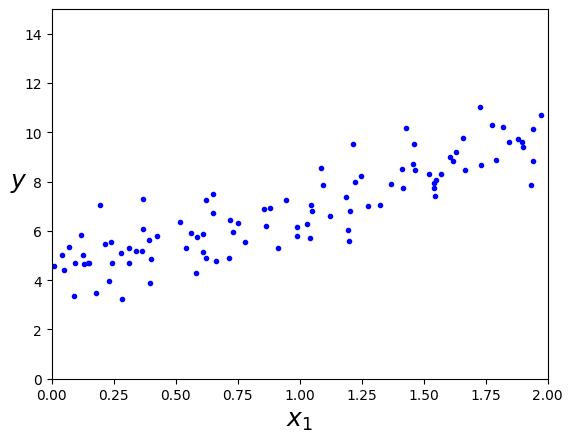

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The coefficient of the model

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

How to find model prediction in a new sample?

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Based on the graph, it makes sense.

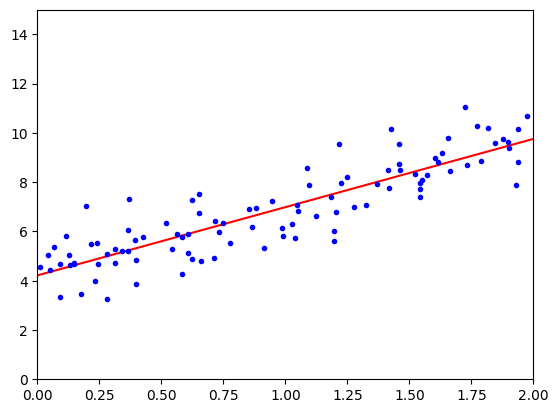

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Let's solve the same problem using sklearn

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict([[0], [2]])

array([[4.21509616],
       [9.75532293]])

### Polynomial regression

In [11]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

Let's generate a synthetic dataset with a target y that has a polynomial dependency on features X.

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

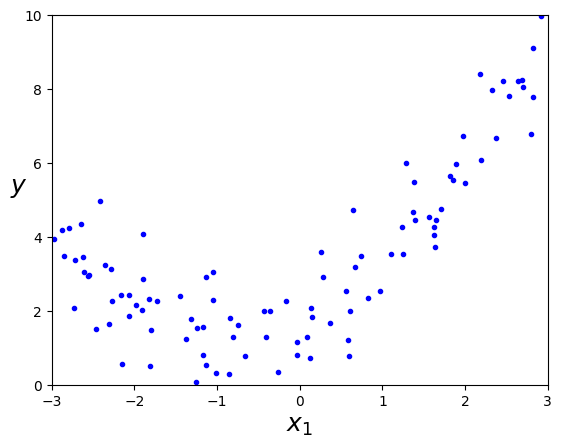

In [13]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Let's "enrich" the dataset with the polynomial features

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])
print(X[0]**2)

[-0.75275929]
[-0.75275929  0.56664654]
[0.56664654]


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Here we'll consider different degrees of polynomial features: 1, 2, 300

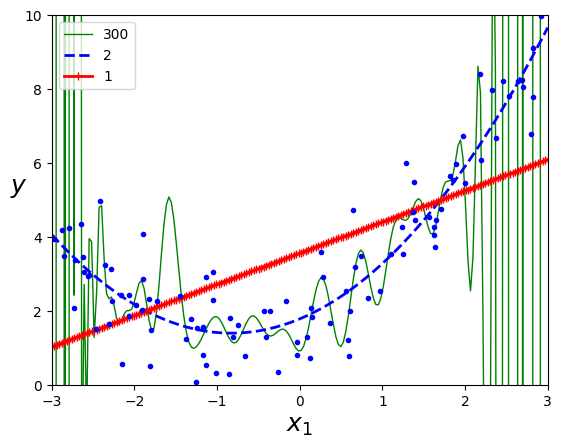

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_new = np.linspace(-3, 3, num=200).reshape(-1,1)

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

##### Mean square error of a model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.5, random_state=10)

In [20]:
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [21]:
model = LinearRegression()
model.fit(X_train_poly_scaled, y_train)

LinearRegression()

In [22]:
y_val_predict = model.predict(X_val_poly_scaled)
val_error = mean_squared_error(y_val, y_val_predict)

In [23]:
print(val_error)

0.9418567491761448


In [24]:
def get_error(poly_degree, X_train, X_val, y_train, y_val):
    poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=poly_degree, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

    X_train_poly_scaled = poly_scaler.fit_transform(X_train)
    X_val_poly_scaled = poly_scaler.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)
    y_val_predict = model.predict(X_val_poly_scaled)

    val_error = mean_squared_error(y_val, y_val_predict)

    return val_error

In [25]:
val_errors = [get_error(poly_degree, X_train, X_val, y_train, y_val) for poly_degree in range(1,11)]

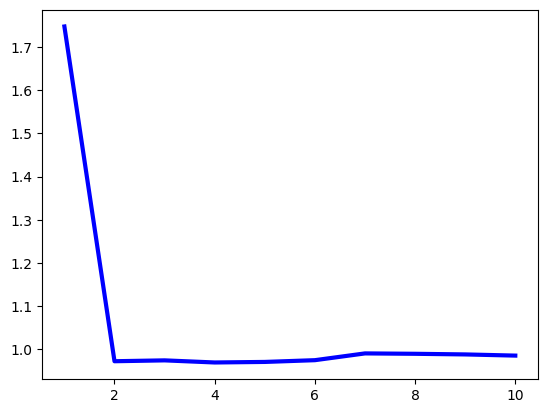

In [26]:
plt.plot(list(range(1,11)), np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [27]:
final_pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("linear_model", LinearRegression())
    ])

In [28]:
final_pipeline.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('linear_model', LinearRegression())])

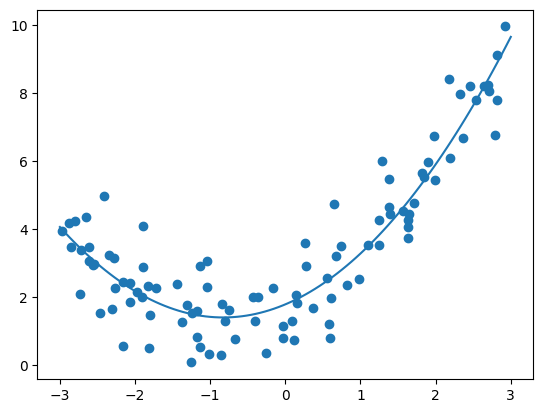

In [29]:
X_test = np.linspace(-3, 3, 100)
plt.plot(X_test, final_pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.scatter(X, y, label="True function")

### Regularization

In [30]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [31]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

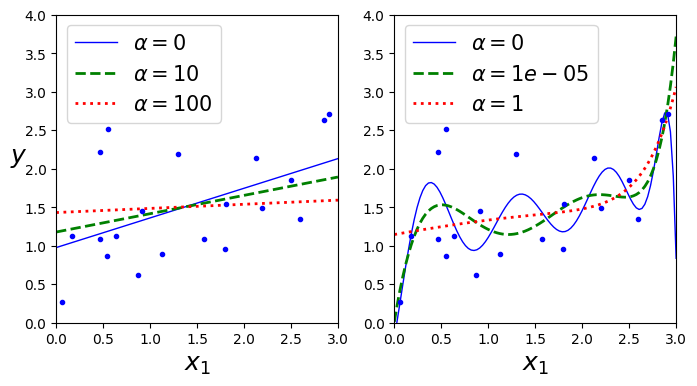

In [32]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


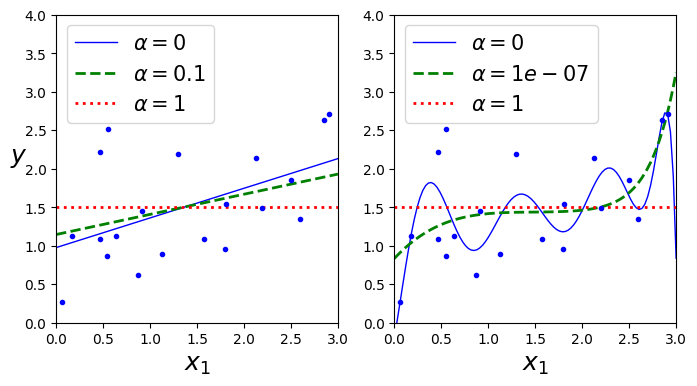

In [33]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

### Logistic regression

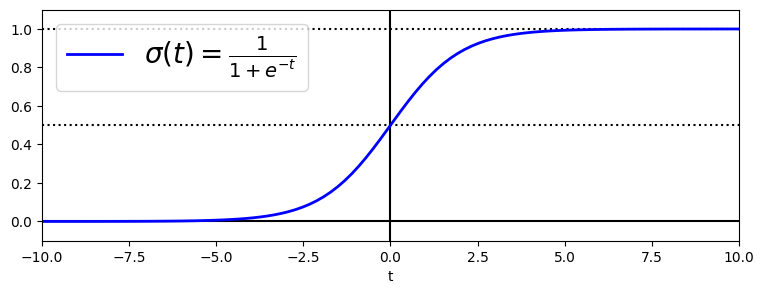

In [34]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [64]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [65]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [66]:
iris["data"].shape

(150, 4)

In [67]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

In [68]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

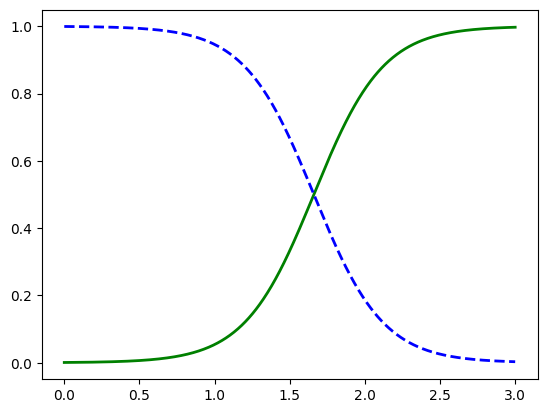

In [69]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [71]:
decision_boundary

array([1.66066066])

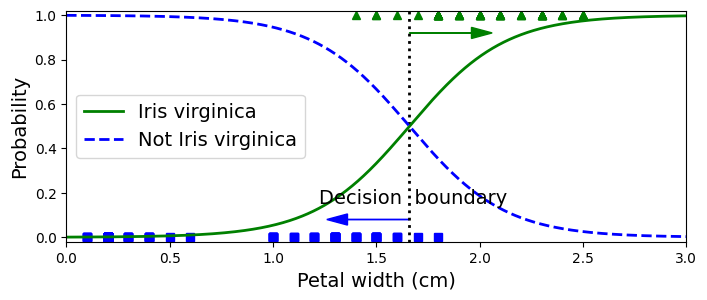

In [75]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary_idx = np.argmax(y_proba[:, 1] >= 0.5)
decision_boundary = X_new[decision_boundary_idx]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [76]:
decision_boundary

array([1.66066066])

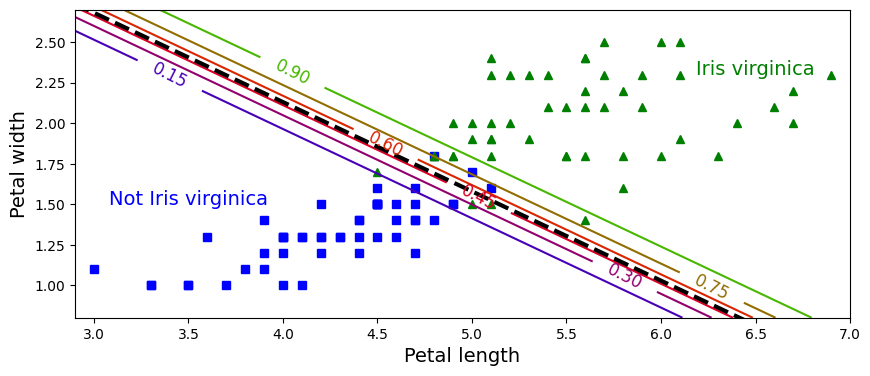

In [77]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [51]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

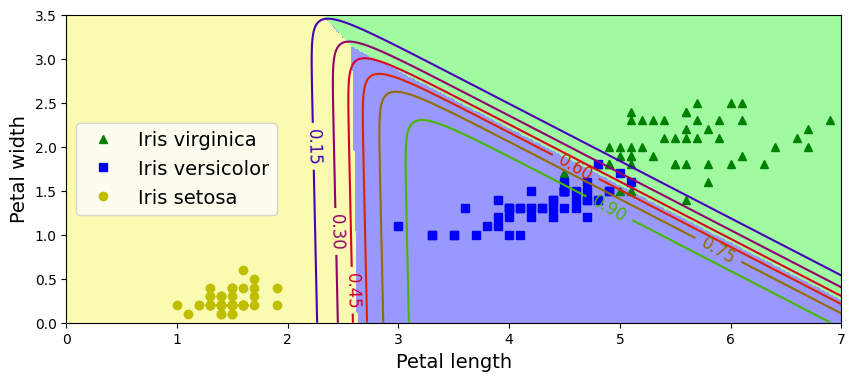

In [52]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

Finally, we train the model on all the features.

In [53]:
X = iris["data"]
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=11)

In [54]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, y_train)

C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [55]:
y_pred = softmax_reg.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
accuracy_score(y_test, y_pred)

0.9565217391304348

In [58]:
confusion_matrix(y_test, y_pred)

array([[6, 0, 0],
       [0, 7, 0],
       [0, 1, 9]], dtype=int64)

# Assignment

In [88]:
import pandas as pd
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import Image

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

Problem 1. Train the polynomial regression model for the following problem with degrees 1, 4, 15. For degree 15 train a model with regularization. Try different regularization options. Make conclusions.

In [84]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X = np.reshape(X, (-1, 1))

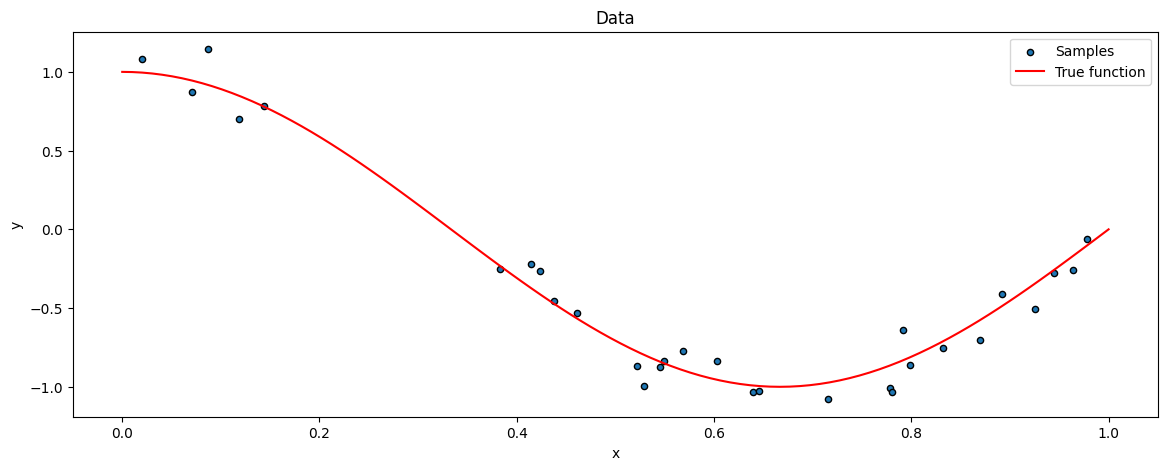

In [86]:
# Plot the true function
plt.figure(figsize=(14, 5))
plt.scatter(X, y, s=20, edgecolor="black", label="Samples")
X_plot = np.linspace(0, 1, 100)
plt.plot(X_plot, true_fun(X_plot), color="r", label="True function")
plt.title("Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

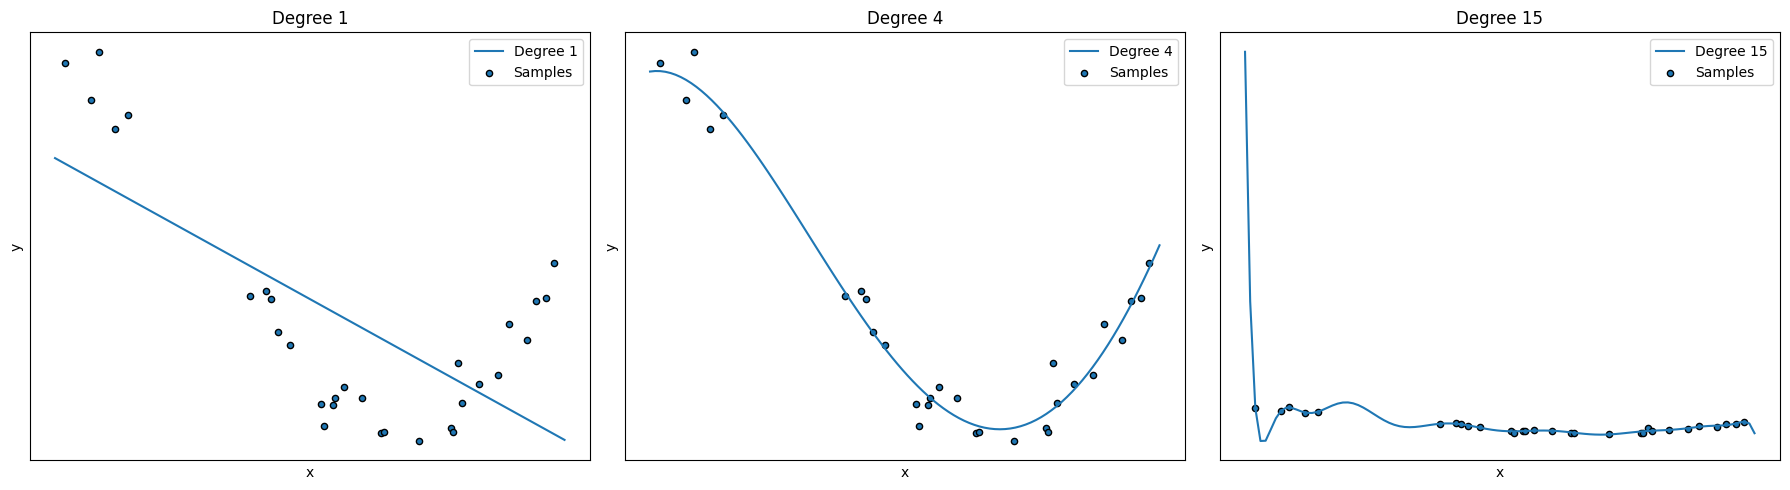

In [117]:
# Train polynomial regression models with different degrees. For plotting we use random sample that was generated by us. 
degrees = [1, 4, 15]
plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    # Generate polynomial features and fit a linear regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X_plot.reshape(-1, 1))

    # Plot the fitted curve
    plt.plot(X_plot, y_pred, label="Degree %d" % degree)
    plt.scatter(X, y, s=20, edgecolor="black", label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree %d" % degree)
    
plt.tight_layout()
plt.show()

### Polynomial Regression Model Results

#### Degree 1:
- **Explanation**: The model tries to fit a straight line to the data. It shows a simple relationship between the input and output.
- **Observation**: The line roughly follows the trend of the data, but it's not very precise.

#### Degree 4:
- **Explanation**: The model becomes a bit more flexible, fitting a curve instead of a straight line.
- **Observation**: The curve fits the data better than the straight line, capturing some of the patterns in the data more accurately.

#### Degree 15:
- **Explanation**: The model becomes highly flexible, trying to fit every data point precisely.
- **Observation**: The curve fits the training data almost perfectly, but it's likely too flexible and may not generalize well to new data.

### Overall Observation:
- As we increase the degree of the polynomial, the model becomes more flexible and fits the training data better. However, too much flexibility can lead to overfitting, where the model learns from noise in the data instead of the underlying pattern.

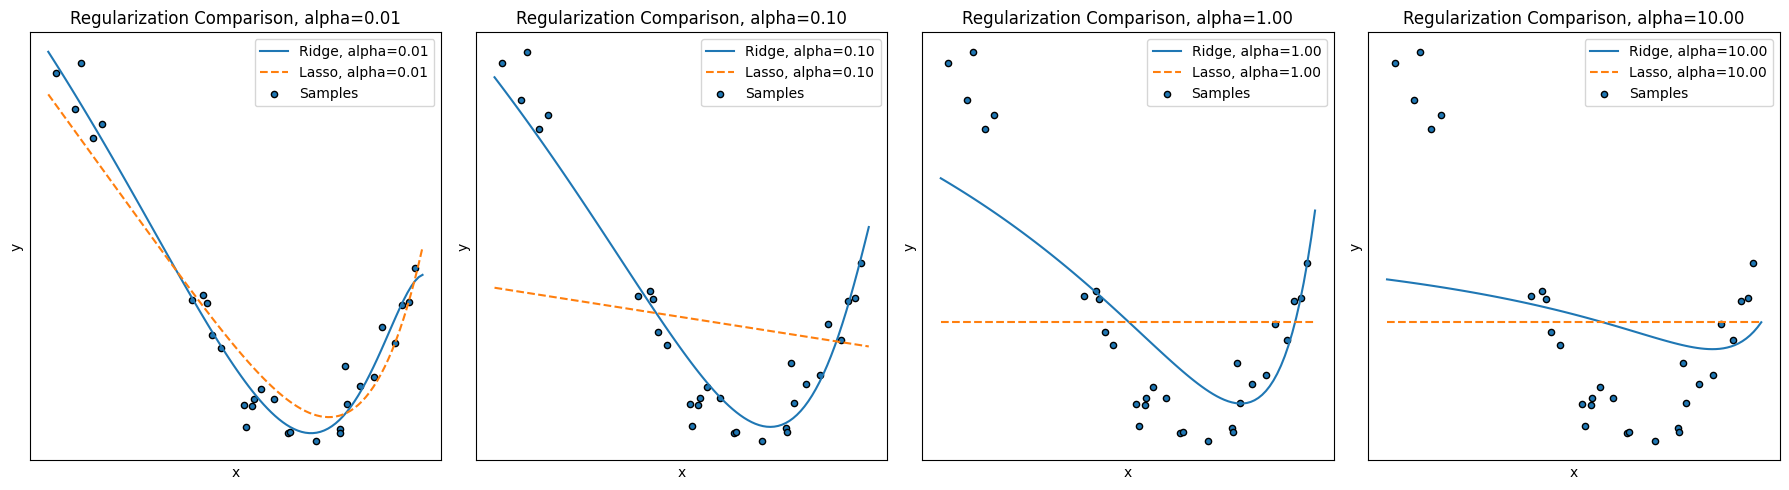

In [118]:
# Train polynomial regression model with degree 15 and regularization
alphas = [0.01, 0.1, 1, 10]
plt.figure(figsize=(18, 5))

for i, alpha in enumerate(alphas):
    ax = plt.subplot(1, len(alphas), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Generate polynomial features and fit a Ridge regression model
    ridge_model = make_pipeline(PolynomialFeatures(15), Ridge(alpha=alpha))
    ridge_model.fit(X, y)
    ridge_y_pred = ridge_model.predict(X_plot.reshape(-1, 1))

    # Generate polynomial features and fit a Lasso regression model
    lasso_model = make_pipeline(PolynomialFeatures(15), Lasso(alpha=alpha))
    lasso_model.fit(X, y)
    lasso_y_pred = lasso_model.predict(X_plot.reshape(-1, 1))

    # Plot the fitted curves
    plt.plot(X_plot, ridge_y_pred, label="Ridge, alpha=%.2f" % alpha)
    plt.plot(X_plot, lasso_y_pred, label="Lasso, alpha=%.2f" % alpha, linestyle='--')
    plt.scatter(X, y, s=20, edgecolor="black", label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Regularization Comparison, alpha=%.2f" % alpha)

plt.tight_layout()
plt.show()

In [122]:
lasso_coefficients = lasso_model.named_steps['lasso'].coef_
ridge_coefficients = ridge_model.named_steps['ridge'].coef_

print("Lasso Coefficients:", lasso_coefficients)
print("Ridge Coefficients:", ridge_coefficients)

Lasso Coefficients: [ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.]
Ridge Coefficients: [ 0.         -0.27799499 -0.18232869 -0.10179509 -0.0487777  -0.01448464
  0.00789268  0.02263345  0.03238466  0.03880735  0.04296577  0.04555714
  0.04704834  0.04775863  0.04791055  0.04766186]


### Polynomial Regression Model with Regularization

#### Regularization Techniques:
- **Ridge Regression**: Controls model complexity by adding a penalty term to the regression coefficients.
- **Lasso Regression**: Encourages sparse models by adding an L1 penalty term, leading to some coefficients becoming exactly zero.

#### Observations:
- For each value of alpha (regularization parameter), both Ridge and Lasso regression models are fitted with polynomial features of degree 15.
- **Ridge Regression**: The curves represent the fitted predictions using Ridge regression with different alpha values. As alpha increases, the flexibility of the curve decreases, leading to smoother predictions. 
- **Lasso Regression**: Similarly, the dashed curves represent the fitted predictions using Lasso regression. Lasso tends to produce more sparse models, with some coefficients becoming exactly zero, resulting in simpler models with fewer features.

#### Overall Observation:
- Regularization techniques like Ridge and Lasso help control overfitting in polynomial regression models, especially when dealing with high-dimensional data or data with multicollinearity. By adjusting the alpha parameter, we can balance between model complexity and performance.

Problem 2. Train logistic regression model on the wine classification dataset. First, split the dataset into train and test. Make sure to use all the preprocessing that is appicable here (e.g. scaling). What is the accuracy of the obtained model on train and test splits? Confusion matrix?

In [124]:
from sklearn.datasets import load_wine

# Load the wine dataset
data = load_wine()
X, y = data['data'], data['target']
col_names = data['feature_names']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standardization and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Train the model
pipeline.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

Train Accuracy: 1.0
Test Accuracy: 1.0

Train Confusion Matrix:
[[45  0  0]
 [ 0 57  0]
 [ 0  0 40]]

Test Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


### Results Explanation:

#### Accuracy:
- **Train Accuracy**: The model correctly classified all samples in the training set, achieving an accuracy of 100%.
- **Test Accuracy**: Similarly, the model correctly classified all samples in the test set, also achieving an accuracy of 100%.

#### Confusion Matrix:
- **Train Confusion Matrix**: 
  - Diagonal elements (from top left to bottom right) represent the number of correctly classified samples for each class.
  - Off-diagonal elements represent misclassifications. Since all values are zeros, there are no misclassifications in the training set.
- **Test Confusion Matrix**: 
  - Similar to the train confusion matrix, all diagonal elements are non-zero, indicating correct classifications for each class.
  - Again, there are no misclassifications in the test set.

### Script Explanation:

- **Data Loading and Preprocessing**: 
  - The script loads the wine dataset and splits it into training and testing sets.
  - It uses `StandardScaler` to scale the features, ensuring that they have a mean of zero and standard deviation of one.
- **Model Training and Evaluation**:
  - It creates a pipeline that combines feature scaling (`StandardScaler`) with logistic regression.
  - The model is trained on the training data and evaluated on both train and test sets.
- **Accuracy Calculation**:
  - Accuracy scores are calculated for both train and test sets using `accuracy_score` from `sklearn.metrics`.
- **Confusion Matrix**:
  - Confusion matrices are computed for both train and test sets to analyze the model's performance ihout any misclassifications.